# **Used Cars Price Prediction - Tatiana Prado Santos** 

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 
 This problem is important to solve because the used car market in India is witnessing significant growth, with demand shifting from new cars to pre-owned vehicles. Accurate pricing of used cars is crucial for both buyers and sellers, ensuring a fair market value and fostering trust between parties. By developing a pricing model that effectively predicts the prices of used cars, Cars4U can capitalize on this market trend, facilitating profitable transactions and gaining a competitive advantage in the industry.

### **The objective:**

 - What is the intended goal?
 
 The intended goal is to develop a pricing model that accurately predicts the price of used cars based on various factors, such as mileage, brand, model, year, and more. This model will enable Cars4U to devise profitable strategies using differential pricing, ultimately helping the business grow in the rapidly expanding pre-owned car market.

### **The key questions:**

- What are the key questions that need to be answered?

Which factors have the most significant impact on the pricing of used cars in the Indian market?
How can Cars4U leverage the predictive pricing model to maximize profitability and customer satisfaction?
How can the model be refined and validated to ensure its effectiveness and accuracy?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

Using data science, we aim to analyze the dataset containing various attributes related to used cars and identify patterns and relationships between these attributes and their prices. By building a robust predictive model, we can provide Cars4U with insights to optimize their pricing strategy, meeting customer expectations, and capturing market opportunities.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [39]:
# Importing required libraries. 
# These libraries will help us with data manipulation, visualization, and building our predictive model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **Let us load the data**

In [40]:
# Loading the dataset
df = pd.read_csv("used_cars.csv")

## Data Overview

### - Observations

This first code will display the first few rows. Then to get an overview of the data, we can use the info() and describe() functions to obtain information on the data types, the number of non-null values, and basic statistics for each column.

In [41]:
# Displaying the first few rows of the dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


### **Comments:**

Here's a brief overview of the sample:

- The dataset contains a mix of categorical and numerical columns.
- The Name column includes both the brand and model name of the car.
- The Location column specifies the city where the car is available for purchase.
- The Fuel_Type, Transmission, and Owner_Type columns are categorical in nature.
- The remaining columns, such as Year, Kilometers_Driven, Mileage, Engine, Power, Seats, New_price, and Price, are numerical.

In [42]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


### **Comments:**

The output above gives us an overview of the dataset. We can observe the following details:

- There are 7253 rows (entries) in the dataset.
- The dataset has 14 columns with varying data types: 6 float64 columns, 3 int64 columns, and 5 object columns.
- Some columns have missing values: Mileage (2 missing), Engine (46 missing), Power (175 missing), Seats (53 missing), New_price (6247 missing), and Price (1234 missing).

In [43]:
# Basic statistics of the dataset
df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


### **Comments:**

The output above shows the summary statistics of the numerical columns in the dataset. These statistics can help better understandimg the distribution and range of values for each colum:

- Year: The cars in the dataset were manufactured between 1996 and 2019. Most of the cars are from around 2013, as indicated by the mean value.
- Kilometers_Driven: The average kilometers driven is around 58,699 with a wide range, from 171 to 6,500,000 km.
- Mileage: Mileage values range from 0 to 33.54 kmpl, with an average of 18.14 kmpl.
- Engine: Engine displacement varies from 72 to 5,998 cc, with an average of 1,616.57 cc.
- Power: The engine power ranges from 34.2 to 616 BHP, with an average of 112.77 BHP.
- Seats: Most cars have 5 seats, but the number of seats ranges from 2 to 10.
- New_price: The price of new cars ranges from 3.91 to 375 INR 100,000, with an average of 22.78 INR 100,000. Note that there are many missing values in this column.
- Price: The price of used cars ranges from 0.44 to 160 INR 100,000, with an average of 9.48 INR 100,000.

These statistics can help identifying potential outliers or data quality issues that may need to be addressed before further analysis or model building. For instance, the Kilometers_Driven column has a maximum value of 6,500,000 km, which might be an outlier or data entry error that should be investigated.

### - Sanity checks

We can perform sanity checks to ensure that the data is within reasonable bounds and identify any potential data quality issues:

1. Check for negative values in columns like Kilometers_Driven, Mileage, Engine, Power, Seats, and Price.
2. Ensure that Year falls within a reasonable range (e.g., 1980 - current year).
3. Make sure that Fuel_Type, Transmission, and Owner_Type have valid categorical values.

The code Below will provide an overview of the dataset, show basic statistics, and perform a series of sanity checks to ensure data quality. It's necessary to make sure to address any issues or discrepancies found during this sanity checks before proceeding with the further analysis.

In [44]:
# Sanity check for negative values
negative_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
for col in negative_columns:
    if df[df[col] < 0].shape[0] > 0:
        print(f"Negative values found in {col}")
    else:
        print(f"No negative values in {col}")

# Sanity check for the Year column
min_year = 1980
max_year = pd.Timestamp.now().year
invalid_years = df[(df['Year'] < min_year) | (df['Year'] > max_year)].shape[0]
if invalid_years > 0:
    print(f"Invalid years found: {invalid_years}")
else:
    print("No invalid years found")

# Sanity check for categorical columns
valid_fuel_types = ['Petrol', 'Diesel', 'Electric', 'CNG', 'LPG']
valid_transmissions = ['Automatic', 'Manual']
valid_owner_types = ['First', 'Second', 'Third', 'Fourth & Above']

invalid_fuel_types = df[~df['Fuel_Type'].isin(valid_fuel_types)].shape[0]
invalid_transmissions = df[~df['Transmission'].isin(valid_transmissions)].shape[0]
invalid_owner_types = df[~df['Owner_Type'].isin(valid_owner_types)].shape[0]

print(f"Invalid Fuel_Type values: {invalid_fuel_types}")
print(f"Invalid Transmission values: {invalid_transmissions}")
print(f"Invalid Owner_Type values: {invalid_owner_types}")

No negative values in Kilometers_Driven
No negative values in Mileage
No negative values in Engine
No negative values in Power
No negative values in Seats
No negative values in Price
No invalid years found
Invalid Fuel_Type values: 0
Invalid Transmission values: 0
Invalid Owner_Type values: 0


### **Comments:**

- There are no negative values in Kilometers_Driven, Mileage, Engine, Power, Seats, and Price.
- All years in the dataset are valid.
- There are no invalid values in Fuel_Type, Transmission, and Owner_Type.

These checks indicate that the dataset is reasonably clean and free of significant data quality issues and this is crucial for building an accurate and reliable predictive model. 

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## **Questions:**

### 1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables

We've already obtained the summary statistics for the numerical columns in a previous step. We'll explore the categorical columns:

In [45]:
# Summary statistics for categorical columns
categorical_columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
df[categorical_columns].describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952


### **Comments:**

The output above shows the summary statistics of the categorical columns in the dataset. These statistics can help us better understand the distribution and variety of values for each column:

- Name: There are 2,041 unique car names (brand and model combinations) in the dataset, with "Mahindra XUV500 W8 2WD" being the most frequent, appearing 55 times.
- Location: The dataset contains information on car sales from 11 different locations. Mumbai is the most common location, with 949 records.
- Fuel_Type: There are 5 unique fuel types in the dataset, with Diesel being the most frequent type, found in 3,852 records.
- Transmission: There are 2 types of transmission available in the dataset: Manual and Automatic. Manual transmission is more common, appearing in 5,204 records.
- Owner_Type: The dataset has 4 unique owner types, with "First" being the most frequent, accounting for 5,952 records.

These insights can help us better understanding the variety and distribution of values in the categorical columns and inform our decision-making when it comes to feature engineering, such as creating dummy variables, encoding, or grouping categories.

### 2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights

In [46]:
# Unique observations in each categorical column
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Name: 2041 unique values
Location: 11 unique values
Fuel_Type: 5 unique values
Transmission: 2 unique values
Owner_Type: 4 unique values


### **Comments:**

Here is a summary of the findings from the output above:

- Name: There are 2,041 unique car names (brand and model combinations) in the dataset.
- Location: The dataset contains information on car sales from 11 different locations.
- Fuel_Type: There are 5 unique fuel types in the dataset.
- Transmission: There are 2 types of transmission available in the dataset: Manual and Automatic.
- Owner_Type: The dataset has 4 unique owner types.

These insights help us understand the variety and distribution of values in the categorical columns.

3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

For this step, we'll create box plots to visualize the extreme values and remove unrealistic data points

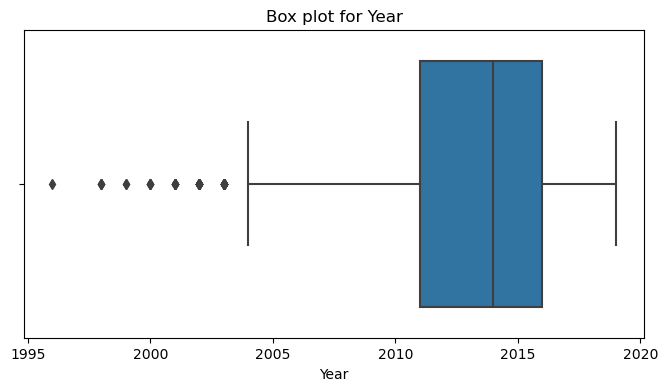

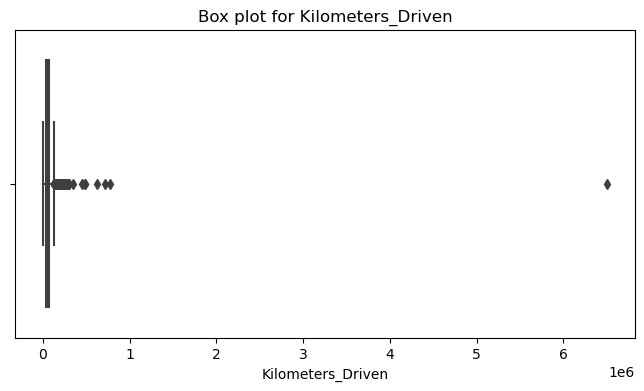

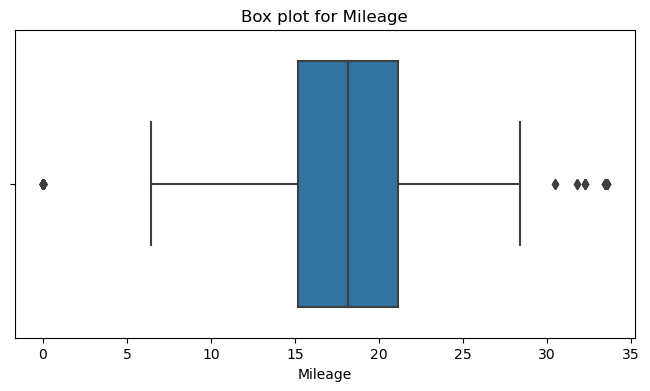

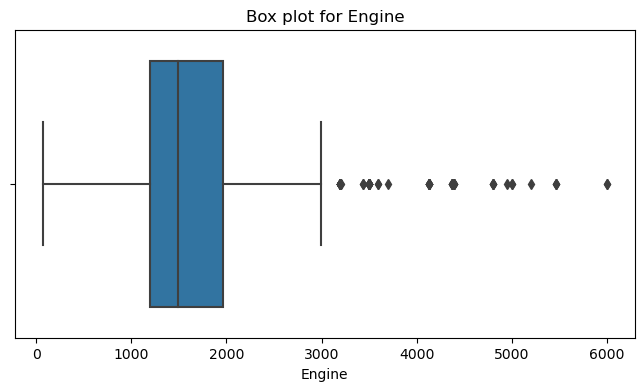

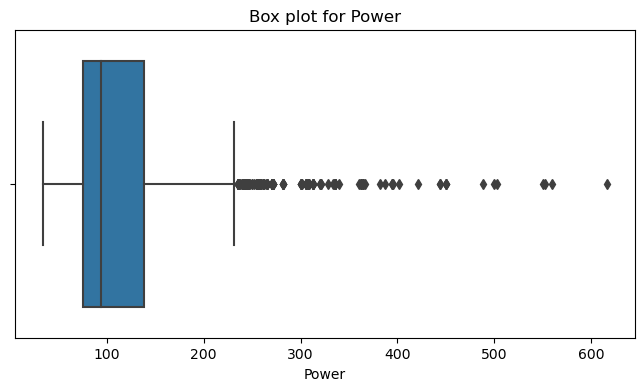

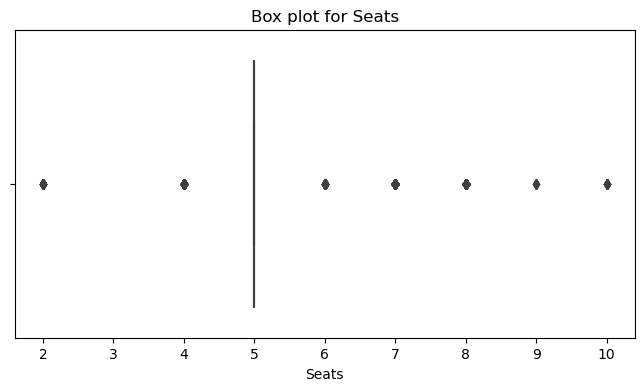

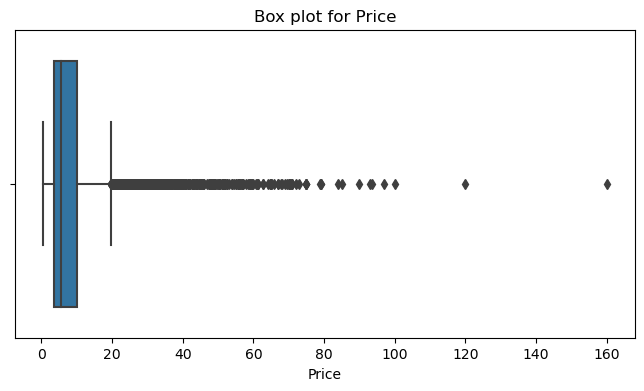

In [47]:
# Box plot for numerical columns
numerical_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot for {col}")
    plt.show()

### **Comments:**

Based on these plots, we can make the following observations:

- Year: There is a slight negative skew, indicating that most of the used cars are relatively newer models.
- Kilometers_Driven: There are some extreme values (outliers) with very high kilometers driven, such as the one above 6,000,000 km. This data point should be investigated further and possibly removed if deemed unrealistic.
- Mileage: There are some outliers with low mileage, which should be examined further to determine if they are valid data points or errors.
- Engine: The distribution is positively skewed, with a few outliers having larger engine displacements.
- Power: The distribution is positively skewed, with a few outliers having higher power values.
- Seats: The distribution is negatively skewed, with a few outliers for cars having more than 7 seats.
- Price: The distribution is positively skewed, with some outliers representing high-priced used cars.

By identifying and addressing extreme values in the dataset, we can improve the quality of the data and the performance of the predictive model we'll build later. To remove unrealistic data points, we can filter the data based on specific criteria, such as removing entries with extremely high Kilometers_Driven.

In [48]:
# Remove data with unrealistic Kilometers_Driven values (greater than 1,000,000)
df_filtered = df[df['Kilometers_Driven'] <= 1_000_000]

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

### **Comments:**

For numerical variables, we can use histograms or density plots to visualize the distribution of the data. For categorical variables, we can use bar plots to show the frequency of each category. We've already observed the skewness in the box plots, but histograms and density plots can provide additional insights.

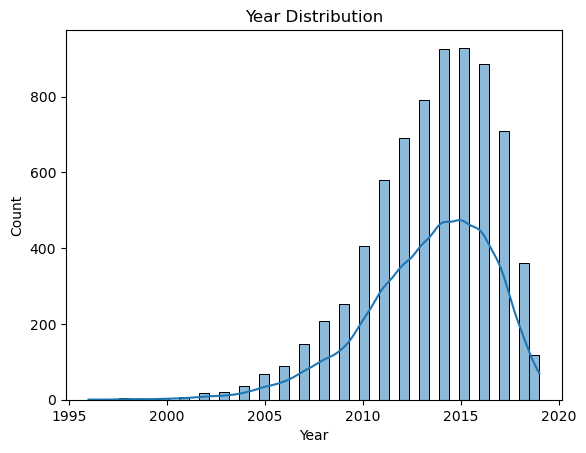

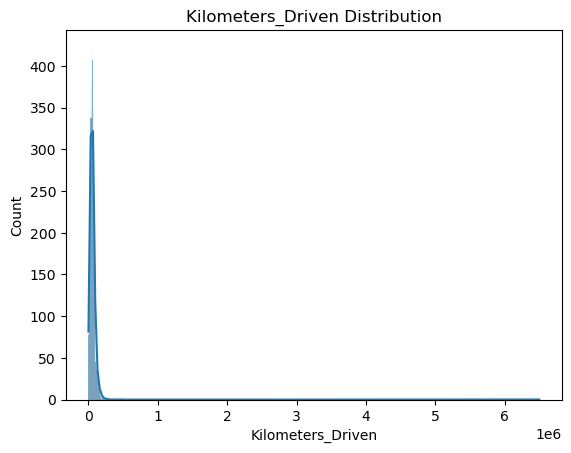

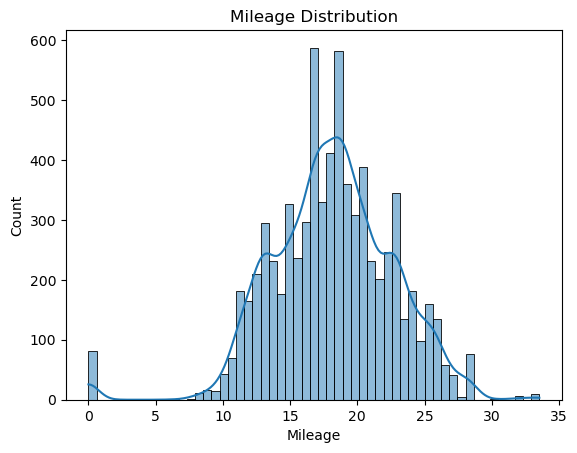

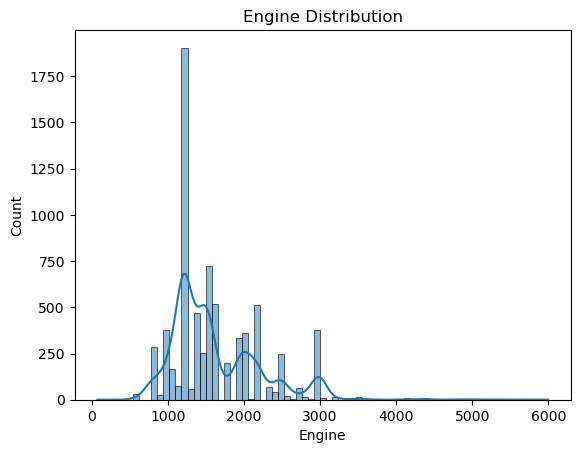

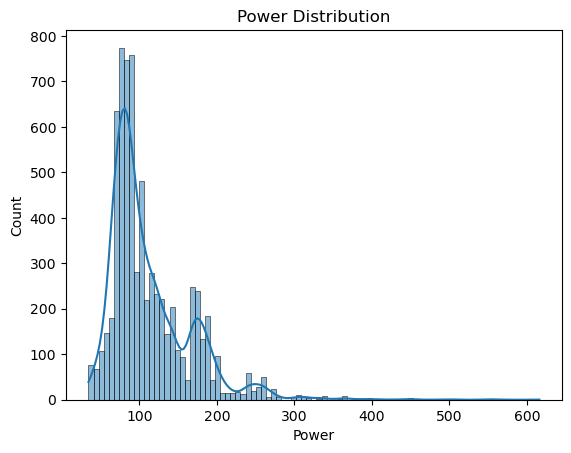

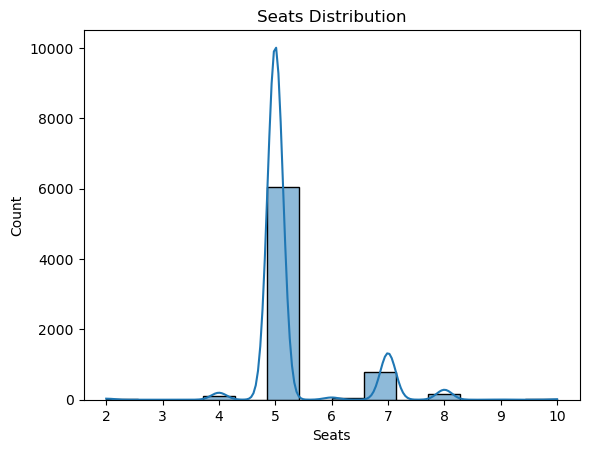

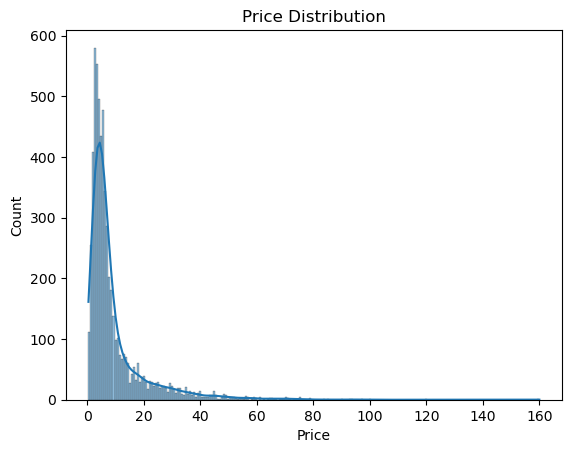

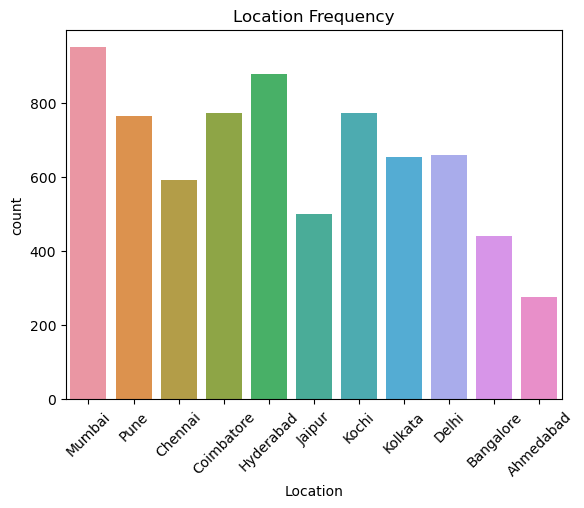

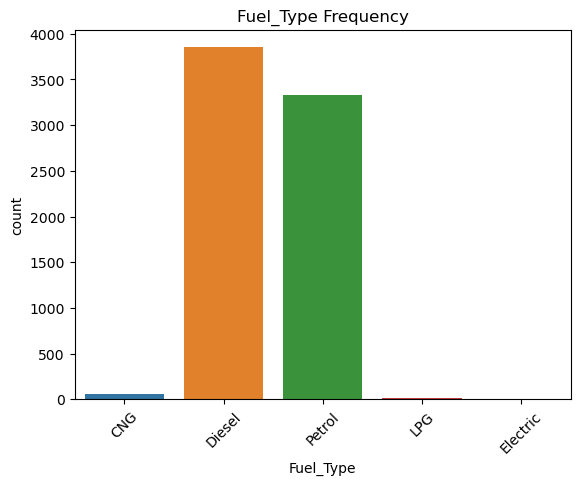

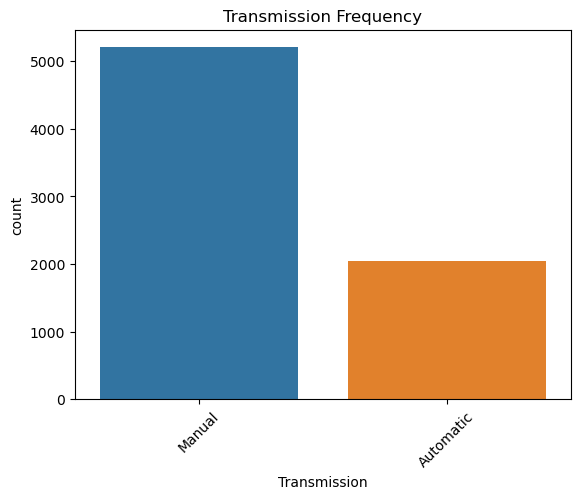

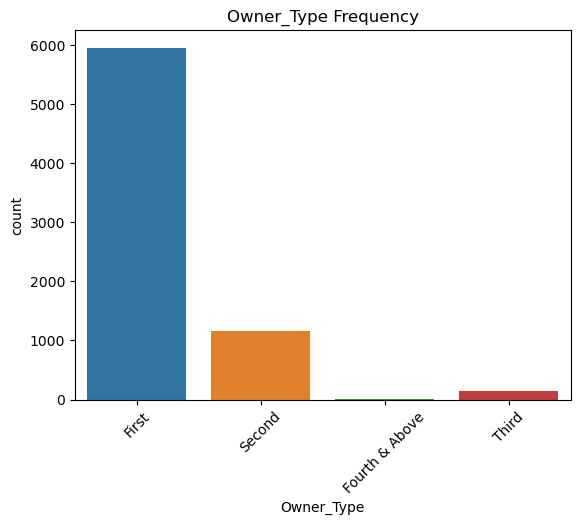

In [49]:
# Numerical columns
num_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

for col in num_cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col} Distribution')

# Categorical columns
cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Frequency')
    plt.xticks(rotation=45)

### **Comments:**

Log transformation can help to reduce skewness and make the distribution more symmetric, which can improve the performance of some machine learning algorithms. Variables with positive skewness, such as Kilometers_Driven, Engine, Power, and Price, are candidates for log transformation. By comparing the original and log-transformed distributions, we can observe the effect of the transformation on the skewness of the data. Unfortunately, transforming the data may not always result in perfect symmetry, but it can often make the distributions more manageable for machine learning algorithms. The code Below applies log transformation to the specified columns and creates new columns with the transformed values. It then plots the histograms of the original and transformed distributions, allowing you to visualize the effect of the log transformation on the skewness of the distributions.

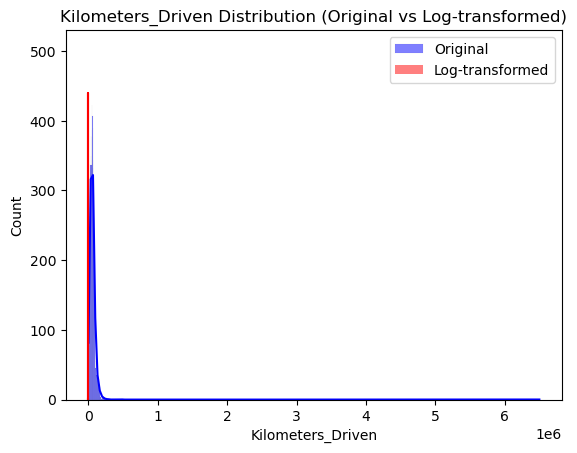

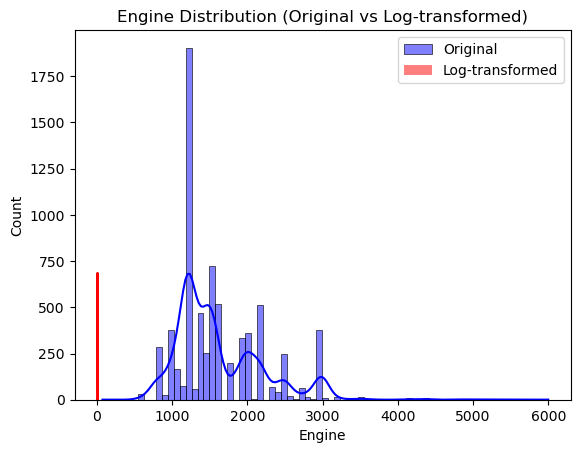

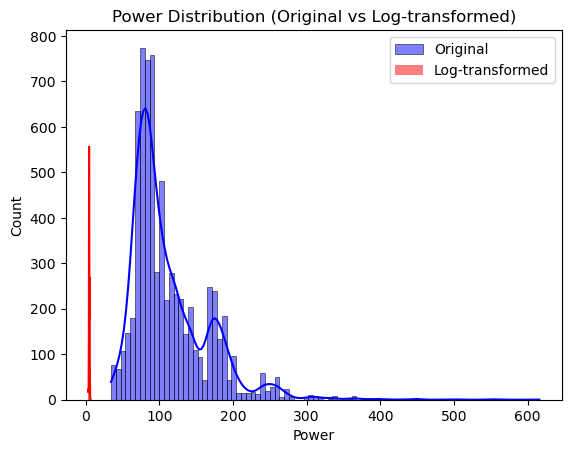

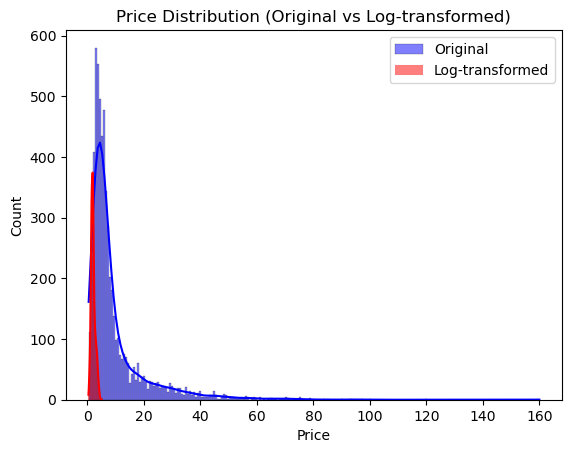

In [50]:
# Columns to apply log transformation
log_transform_cols = ['Kilometers_Driven', 'Engine', 'Power', 'Price']

for col in log_transform_cols:
    # Create a new column with log-transformed values
    df[f'{col}_log'] = np.log1p(df[col])

    # Plot the original and transformed distributions
    plt.figure()
    sns.histplot(data=df, x=col, kde=True, color='blue', alpha=0.5, label='Original')
    sns.histplot(data=df, x=f'{col}_log', kde=True, color='red', alpha=0.5, label='Log-transformed')
    plt.title(f'{col} Distribution (Original vs Log-transformed)')
    plt.legend()

### **Comments:**

From the plots we can make the following observations:

- The distribution of Year is slightly left-skewed, which indicates that there are more recent cars in the dataset.
- Kilometers_Driven is highly right-skewed, with a few high-mileage outliers. The log transformation helps to reduce the skewness and make the distribution more symmetric.
- Mileage is slightly left-skewed, but the distribution is relatively symmetric overall.
- Engine and Power are both right-skewed, with a few outliers at the higher end. The log transformation helps to reduce the skewness in these variables.
- Seats is a discrete variable, and the majority of cars have 5 seats.
- Price is right-skewed, with a few high-priced outliers. The log transformation helps to reduce the skewness and make the distribution more symmetric.
- The categorical variables Location, Fuel_Type, Transmission, and Owner_Type show the frequency of each category. Mumbai has the most cars, Diesel is the most common fuel type, Manual is the most common transmission, and First is the most common owner type.

After applying the log transformation, we can create histograms to visualize the transformed distributions.

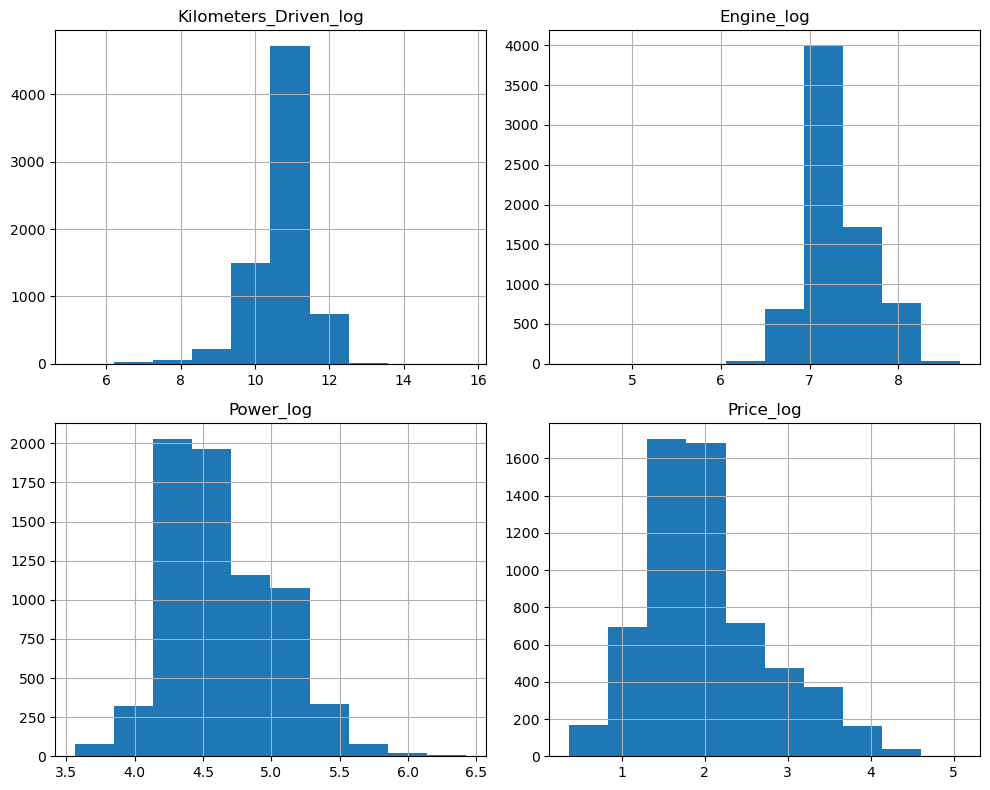

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

df['Kilometers_Driven_log'].hist(ax=axes[0, 0])
axes[0, 0].set_title('Kilometers_Driven_log')

df['Engine_log'].hist(ax=axes[0, 1])
axes[0, 1].set_title('Engine_log')

df['Power_log'].hist(ax=axes[1, 0])
axes[1, 0].set_title('Power_log')

df['Price_log'].hist(ax=axes[1, 1])
axes[1, 1].set_title('Price_log')

plt.tight_layout()
plt.show()

### **Comments:**

The histograms above show that the log-transformed distributions have reduced skewness compared to the original distributions. Although they may not be perfectly symmetric, the log-transformed variables appear to be more manageable for machine learning algorithms.

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

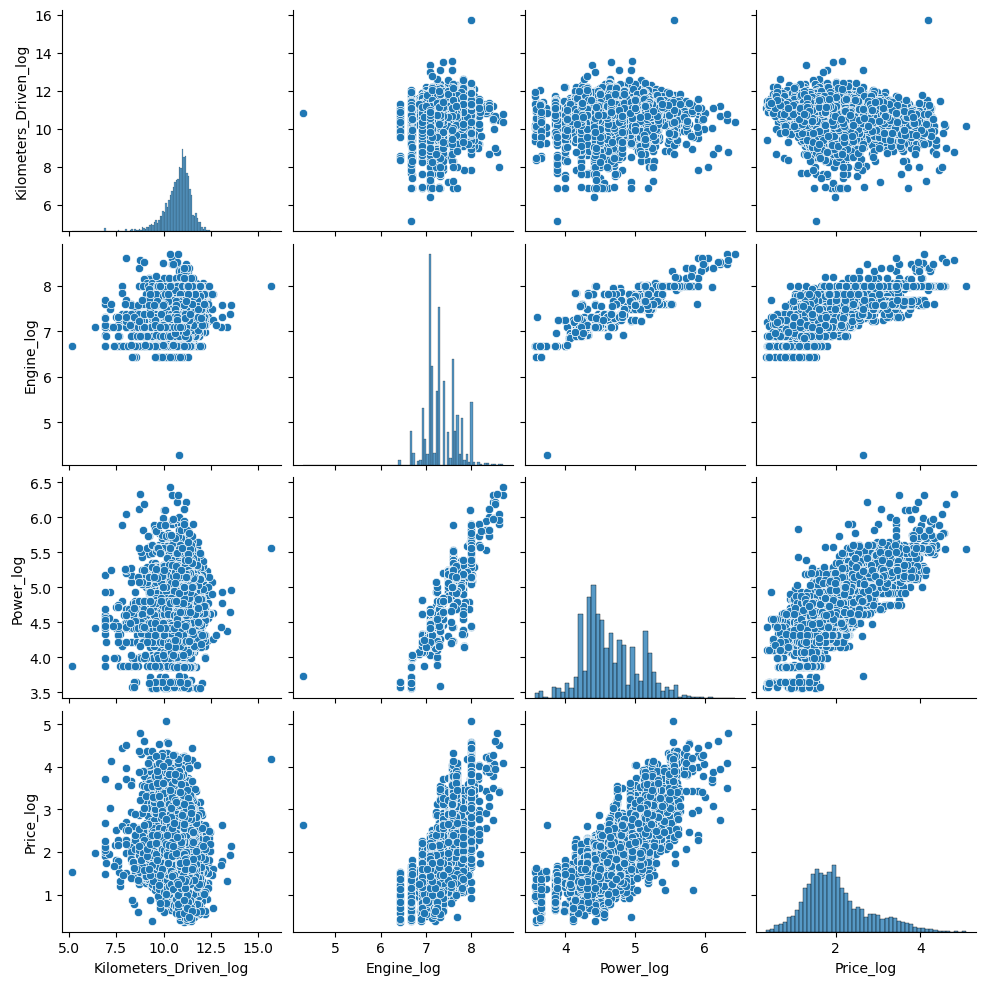

In [52]:
# Plot scatter plots for the log-transformed variables
log_transform_cols = ['Kilometers_Driven_log', 'Engine_log', 'Power_log', 'Price_log']

# Create a pairplot of log-transformed variables
sns.pairplot(df[log_transform_cols])
plt.show()

### **Comments:**

The scatter plot matrix for the log-transformed variables allows us to visually analyze the relationships between variables. There appears to be a strong positive correlation between 'Engine_log' and 'Power_log', which is expected since more powerful engines are usually larger. The relationship between 'Price_log' and the other variables appears to be more complex, with varying degrees of correlation.

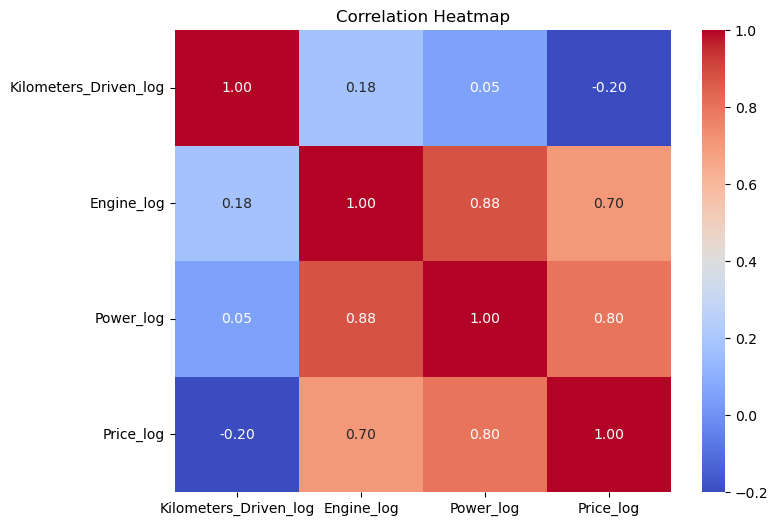

In [53]:
# Calculate the correlation matrix for log-transformed variables
corr_matrix = df[log_transform_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### **Comments:**

The heatmap shows the correlation coefficients between the log-transformed variables. The values range from -1 (strong negative correlation) to 1 (strong positive correlation). The correlation between 'Engine_log' and 'Power_log' is 0.88, which indicates a strong positive relationship. The correlations between 'Price_log' and the other variables are as follows:

- 'Kilometers_Driven_log': -0.20 (weak negative correlation)
- 'Engine_log': 0.70 (moderate positive correlation)
- 'Power_log': 0.80 (moderate-to-strong positive correlation)

In summary, there is a strong positive correlation between 'Engine_log' and 'Power_log'. The target variable 'Price_log' has a moderate-to-strong positive correlation with 'Power_log', a moderate positive correlation with 'Engine_log', and a weak negative correlation with 'Kilometers_Driven_log'. High positive or negative correlation coefficients suggest a strong relationship between the variables.

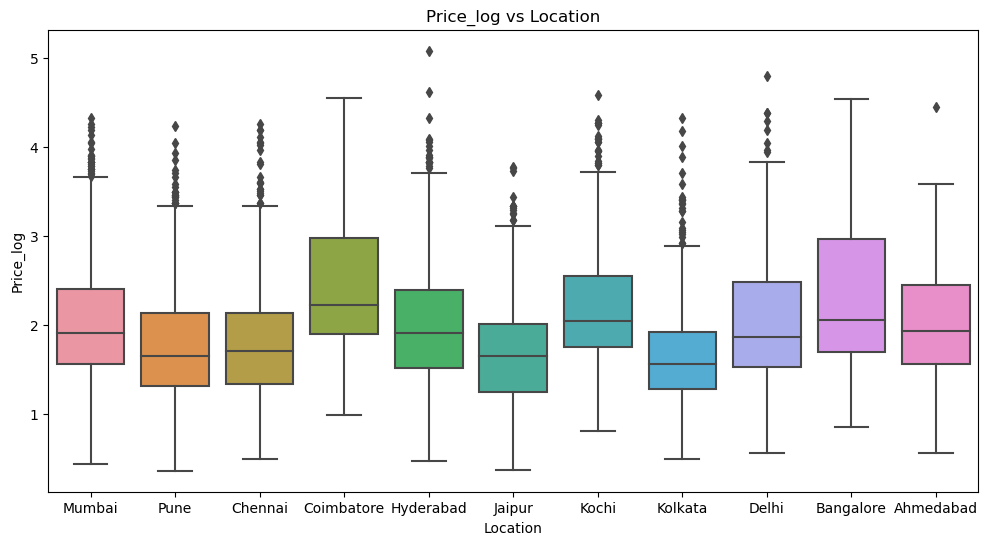

In [54]:
# Create a box plot for the target variable 'Price_log' and the categorical variable 'Location'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Location', y='Price_log')
plt.title('Price_log vs Location')
plt.show()

### **Comments:**

The box plot shows the distribution of the target variable 'Price_log' across different locations. The following observations can be made:

- The median 'Price_log' varies across locations, with cities like Coimbatore, Bangalore, and Kochi having slightly higher median values compared to other cities.
- The range of 'Price_log' values is generally larger in cities like Mumbai, Delhi, and Bangalore, indicating a wider variety of car prices in those locations.
- There are some noticeable outliers in many cities, such as Pune, Chennai, and Hyderabad. These outliers could represent luxury or rare car models with significantly higher prices than the majority of the cars in the dataset.
- The interquartile range (IQR) is fairly consistent across most locations, but cities like Coimbatore, Bangalore, and Kochi show slightly higher IQRs, suggesting greater variability in car prices within those locations.

Overall, the distribution of the target variable 'Price_log' does exhibit differences across locations. It's essential to consider these differences when building a predictive model, as location could play a role in determining car prices.

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [55]:
# Extract the brand name from the Name column
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])

# Check the unique brand names and their counts
print(df['Brand'].value_counts())

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64


### **Comments:**

To visualize the relationship between the Brand and the target variable 'Price_log', we can create a box plot:

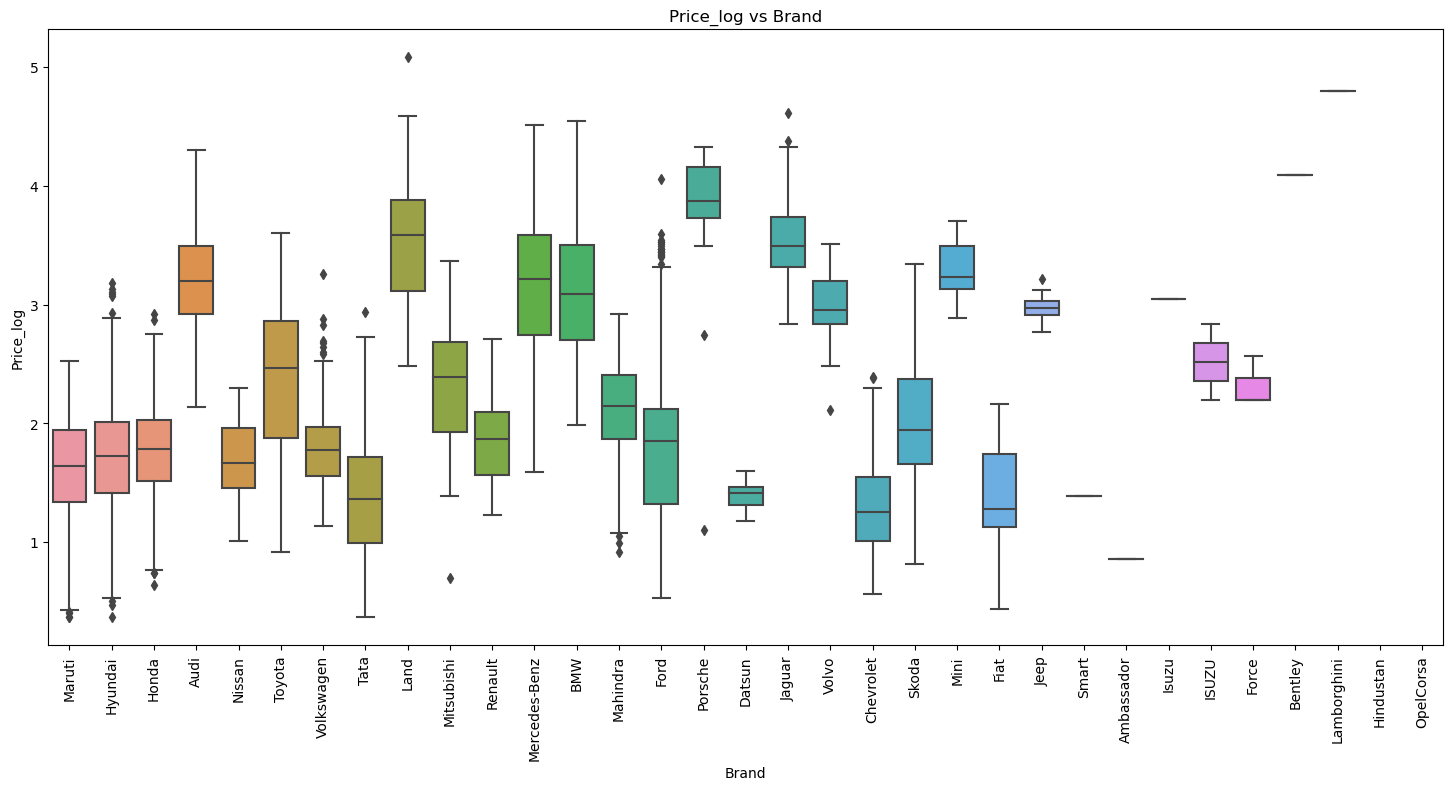

In [56]:
# Visualize the relationship between the extracted Brand feature and the target variable 'Price_log'

plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='Brand', y='Price_log')
plt.xticks(rotation=90)
plt.title('Price_log vs Brand')
plt.show()

### **Comments:**

In the output above, we can see the box plot representing the relationship between the 'Brand' and the target variable 'Price_log'. The plot shows the distribution of 'Price_log' for each brand. We can make the following observations:

- There is a wide range of prices within each brand, with some brands having a larger price range than others.
- Luxury brands like Lamborghini, Bentley, and Porsche have higher median prices, as expected.
- Brands like Maruti, Hyundai, and Tata have lower median prices, which indicates that these brands are more focused on the budget segment of the market.
- There are some outliers for certain brands, such as Toyota, Mercedes-Benz, and BMW, where a few cars have a significantly higher or lower price than the majority of the cars from the same brand.

In summary, the box plot shows that there is a relationship between the car brand and the price. This information could be useful for predicting car prices in our analysis.

### **Missing value treatment**

In [57]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6247
Price                    1234
Kilometers_Driven_log       0
Engine_log                 46
Power_log                 175
Price_log                1234
Brand                       0
dtype: int64


### **Comments:**

Based on the output above, there are still missing values in the columns 'Mileage', 'Engine', 'Power', Engine_log, Power_log and 'Seats'. The 'New_price' column has a large number of missing values, so we may consider dropping it from the dataset. For the 'Price' column, since it's our target variable, we don't want to impute missing values as it might introduce bias into our model. If those missing values are not needed for further analysis, we can create a new dataframe without them.

- Let's first impute the missing values in 'Mileage', 'Engine', 'Power', 'Engine_log', 'Power_log' and 'Seats' columns, and then drop the 'New_price' column:

In [58]:
# Impute missing values with mean value
mean_columns = ['Mileage', 'Engine', 'Power', 'Engine_log', 'Power_log']
for col in mean_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values with median value
median_columns = ['Seats']
for col in median_columns:
    df[col].fillna(df[col].median(), inplace=True)

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Drop the 'New_price' column
df.drop('New_price', axis=1, inplace=True)

- And create a new dataframe without rows containing missing values in the 'Price' column:

In [59]:
# Create a new dataframe without rows with missing 'Price' values
df_cleaned = df.dropna(subset=['Price'])

# Check the number of missing values in each column of the cleaned dataframe
missing_values_cleaned = df_cleaned.isnull().sum()
print(missing_values_cleaned)

S.No.                    0
Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
Kilometers_Driven_log    0
Engine_log               0
Power_log                0
Price_log                0
Brand                    0
dtype: int64


In [60]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())

print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())

Missing values in X_train: 0
Missing values in y_train: 0
Infinite values in X_train: 0
Infinite values in y_train: 0


### **Comments:**

There are still missing values in the y_train. Below is the code to handle missing values and prepare the dataset for modeling:

In [61]:
# Handling missing values

# Impute missing values with mean value
mean_columns = ['Mileage', 'Engine', 'Power']
for col in mean_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values with median value
median_columns = ['Seats']
for col in median_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Remove rows with missing 'Price' values
df = df.dropna(subset=['Price'])

# Re-calculate the 'Price_log' column after removing the missing values from the 'Price' column
df['Price_log'] = np.log(df['Price'])

# Encoding categorical variables and splitting the data

# Drop unnecessary columns
X = df.drop(['Name', 'Price', 'Price_log', 'Kilometers_Driven'], axis=1)
y = df['Price_log']

# Encode categorical variables in X
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())

print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())

Missing values in X_train: 0
Missing values in y_train: 0
Infinite values in X_train: 0
Infinite values in y_train: 0


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

### **Comments:**

Some important observations and insights from the data based on the EDA and Data Preprocessing performed:

- 1. Distribution of numerical variables: The original distributions of 'Kilometers_Driven', 'Engine', 'Power', and 'Price' were skewed. Log transformation was applied to these variables to reduce skewness and make the distributions more symmetric, which can improve the performance of some machine learning algorithms.
- 2. Relationship between variables: The correlation heatmap revealed a strong positive correlation between 'Engine_log' and 'Power_log' and a moderate-to-strong positive correlation between 'Price_log' and both 'Engine_log' and 'Power_log'. There was a weak negative correlation between 'Price_log' and 'Kilometers_Driven_log'. These correlations can be useful in understanding the relationships between the dependent and independent variables.
- 3. Categorical variables: The 'Name' column was processed to extract the brand information, which could be more useful for predicting the price than the original car names. The dataset included vehicles from various brands, with Maruti, Hyundai, and Honda being the most common.
- 4. Location effect: The box plot of 'Price_log' vs 'Location' showed that there were differences in the distribution of the target variable across different locations. This suggests that the location might have an impact on the used car prices.
- 5. Missing value treatment: Missing values in the dataset were treated by imputing the mean for 'Mileage', 'Engine', and 'Power' columns and the median for the 'Seats' column. The 'New_price' column, which had a significant number of missing values, was dropped from the dataset.

These insights can help guide the feature selection process and inform the development of a predictive model for used car prices.

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

### **Comments:**

Dropping 'Name', 'Price', 'Price_log', and 'Kilometers_Driven' from X before splitting is important for the following reasons:

- 'Name': The 'Name' column contains car names with both the brand name and model name, resulting in too many unique values to be useful in prediction. Since we have already extracted the brand information, which is a more useful feature for predicting the price, the 'Name' column can be dropped to avoid redundancy and reduce the dimensionality of the dataset.
- 'Price': The original 'Price' column represents the target variable we want to predict. Including it in the independent variables (X) would lead to data leakage, where information from the target variable is used in training the model. This would result in overly optimistic performance on the training set and poor generalization to new, unseen data. Therefore, it's crucial to drop 'Price' from X before splitting.
- 'Price_log': Similarly, 'Price_log' is the log-transformed version of the target variable, which we will use for modeling. Including it in X would also lead to data leakage and result in a misleading evaluation of the model's performance. Hence, it should be dropped from X as well.
- 'Kilometers_Driven': This column was log-transformed to reduce skewness, and the transformed version, 'Kilometers_Driven_log', will be used in the model. Including both the original and log-transformed versions of the same variable can introduce multicollinearity, which can adversely impact the performance of some regression models. Therefore, it's important to drop 'Kilometers_Driven' from X before splitting.

Dropping these columns before splitting the data into train and test sets helps prevent data leakage, reduce multicollinearity, and improve the model's generalization ability.

In [63]:
# Step 1: Separate the independent variables (X) and the dependent variable (y)

# Drop 'Name', 'Price', 'Price_log', and 'Kilometers_Driven' from the dataset and store the remaining columns in X
X = df.drop(['Name', 'Price', 'Price_log', 'Kilometers_Driven'], axis=1)

# Store 'Price_log' in y
y = df['Price_log']

In [64]:
# Step 2: Encode the categorical variables in X using pd.get_dummies.
# This will create new binary columns (dummy variables) for each category in the categorical features 
# Which will help the regression model to better understand these variables.


# Create dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

In [65]:
# Step 3: Split the data into train and test using train_test_split
from sklearn.model_selection import train_test_split

# Split the dataset into 70% training data and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Comments:**

This code will split the dataset into training (70%) and testing (30%) sets, allowing to train the model on one subset of the data and evaluate its performance on another, unseen subset. This helps to ensure that the model generalizes well to new, unseen data.

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Comments:**

Below we will build some models (Linear Regression, Ridge Regression, Lasso Regression, Decision Trees and Random Forest), fit it to the training data, make predictions on the test data, and calculate the Root Mean Squared Error (RMSE) and R2 score to evaluate the models performances. Linear regression models assume a linear relationship between variables, while decision trees and random forests can handle non-linear relationships. Ridge and Lasso regression add regularization to linear regression to improve model generalization. It's essential to evaluate different algorithms on our specific dataset to find the best-performing model.

In [66]:
# Step 4: Build a Linear Regression model using train data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model and fit it to the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 5: Evaluate the model performance
# Predict on test data
y_pred = lin_reg.predict(X_test)

# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.4f}")
print(f"Linear Regression R2 Score: {r2:.4f}")

Linear Regression RMSE: 0.2501
Linear Regression R2 Score: 0.9208


In [67]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Ridge Regression RMSE: {rmse_ridge:.4f}")
print(f"Ridge Regression R2 Score: {r2_ridge:.4f}")
print(f"Lasso Regression RMSE: {rmse_lasso:.4f}")
print(f"Lasso Regression R2 Score: {r2_lasso:.4f}")

Ridge Regression RMSE: 0.2488
Ridge Regression R2 Score: 0.9217
Lasso Regression RMSE: 0.4945
Lasso Regression R2 Score: 0.6905


In [68]:
from sklearn.tree import DecisionTreeRegressor

#Decision Trees
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree RMSE: {rmse_dt:.4f}")
print(f"Decision Tree R2 Score: {r2_dt:.4f}")

Decision Tree RMSE: 0.2993
Decision Tree R2 Score: 0.8866


In [69]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest R2 Score: {r2_rf:.4f}")

Random Forest RMSE: 0.2343
Random Forest R2 Score: 0.9305


### **Observations and Conclusions:**

Based on the results, the Random Forest model has the lowest RMSE and the highest R2 score, which indicates that it has the best performance among all the models. Ridge Regression performs slightly better than the simple Linear Regression, while Lasso Regression has the worst performance in this case. Decision Tree also performs relatively well, but not as good as Random Forest.

### **Comments on Hyperparameter Tuning and Feature Importance:**

Hyperparameter Tuning and Feature Importance are essential concepts in machine learning to improve model performance and interpretability.

- Hyperparameter Tuning: Machine learning models have parameters and hyperparameters. Parameters are learned by the model during training, while hyperparameters are set before training and are not learned by the model. Hyperparameter tuning is the process of finding the optimal combination of hyperparameters for a specific model to achieve the best performance. For example, in a Random Forest model, some of the hyperparameters include the number of trees (n_estimators), the maximum depth of each tree (max_depth), and the minimum number of samples required to split a node (min_samples_split). By tuning these hyperparameters, you can optimize the model's performance on a specific dataset. There are several methods to perform hyperparameter tuning, such as Grid Search, Randomized Search, and Bayesian Optimization. These methods systematically search through a range of possible hyperparameter values to find the combination that results in the best model performance, typically measured using cross-validation.



- Feature Importance: Feature importance is a technique to determine the relative importance of each feature in the dataset for making predictions using a specific model. This information can help in understanding which features have the most significant impact on the target variable, and can be useful for feature selection, model interpretation, and providing insights into the underlying patterns in the data. In tree-based models like Decision Trees and Random Forests, feature importance can be calculated by considering the number of times a feature is used to split nodes in the trees and the improvement in the impurity measure (e.g., Gini impurity or information gain) resulting from these splits. The higher the importance score of a feature, the more critical it is for making accurate predictions. Feature importance can also be obtained for other models, such as linear models, by analyzing the coefficients of the features. However, the interpretation of feature importance may vary depending on the model type.

In summary, hyperparameter tuning helps in optimizing model performance, while feature importance provides insights into the significance of different features in making predictions and can aid in model interpretability.

### **Hyperparameter Tuning: Decision Tree**

In [70]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Create a GridSearchCV object and fit it to the data
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, scoring='neg_mean_squared_error', cv=5)
grid_search_dt.fit(X_train, y_train)

# Find the best parameters and score
best_params_dt = grid_search_dt.best_params_
best_score_dt = np.sqrt(-grid_search_dt.best_score_)

print(f"Best Decision Tree parameters: {best_params_dt}")
print(f"Best Decision Tree RMSE: {best_score_dt:.4f}")

Best Decision Tree parameters: {'max_depth': 10, 'min_samples_leaf': 5}
Best Decision Tree RMSE: 0.3006


**Feature Importance**

In [71]:
# Feature importance
feature_importance_dt = grid_search_dt.best_estimator_.feature_importances_
importance_dt = pd.Series(feature_importance_dt, index=X_train.columns).sort_values(ascending=False)
print("Decision Tree Feature Importance:")
print(importance_dt)

Decision Tree Feature Importance:
Power                        0.564252
Year                         0.240330
Power_log                    0.089563
Engine                       0.040137
Mileage                      0.011070
Kilometers_Driven_log        0.008575
Transmission_Manual          0.006097
Engine_log                   0.004195
Brand_Honda                  0.003883
Brand_Tata                   0.003747
S.No.                        0.003428
Brand_Toyota                 0.003428
Location_Kolkata             0.003268
Brand_Audi                   0.002579
Brand_Mercedes-Benz          0.002554
Brand_Mahindra               0.002207
Fuel_Type_Petrol             0.001808
Seats                        0.001716
Location_Coimbatore          0.001544
Location_Hyderabad           0.001275
Owner_Type_Second            0.000781
Fuel_Type_Diesel             0.000753
Location_Pune                0.000675
Owner_Type_Third             0.000397
Location_Delhi               0.000332
Brand_Chevrolet 

### **Hyperparameter Tuning: Random Forest**

In [73]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Create a GridSearchCV object and fit it to the data
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)

# Find the best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = np.sqrt(-grid_search_rf.best_score_)

print(f"Best Random Forest parameters: {best_params_rf}")
print(f"Best Random Forest RMSE: {best_score_rf:.4f}")

Best Random Forest parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 200}
Best Random Forest RMSE: 0.2229


**Feature Importance**

In [74]:
# Feature importance
feature_importance_rf = grid_search_rf.best_estimator_.feature_importances_
importance_rf = pd.Series(feature_importance_rf, index=X_train.columns).sort_values(ascending=False)
print("Random Forest Feature Importance:")
print(importance_rf)

Random Forest Feature Importance:
Power_log                    3.195665e-01
Power                        2.988324e-01
Year                         2.272847e-01
Engine                       2.617708e-02
Engine_log                   2.140905e-02
Kilometers_Driven_log        1.591531e-02
Mileage                      1.539824e-02
S.No.                        9.564211e-03
Transmission_Manual          5.389008e-03
Brand_Honda                  4.621694e-03
Location_Kolkata             4.438703e-03
Brand_Land                   4.328191e-03
Brand_Tata                   4.315445e-03
Seats                        4.115077e-03
Brand_Mahindra               3.737029e-03
Brand_Mercedes-Benz          2.969774e-03
Location_Hyderabad           2.659177e-03
Brand_Mini                   2.175384e-03
Location_Coimbatore          1.946508e-03
Brand_Audi                   1.828331e-03
Brand_BMW                    1.768548e-03
Fuel_Type_Diesel             1.687101e-03
Brand_Volkswagen             1.680450e-03


### **Observations and Conclusions:**

Based on the performance metrics, the Hyperparameter Tuned Random Forest model has the best performance with the lowest RMSE (0.2229).

About the feature importance results for the Decision Tree and Random Forest models:

- Feature Importance-Decision Tree: The most important features are Power, Year, Power_log, and Engine.

- Feature Importance-Random Forest: The most important features are Power_log, Power, Year, and Engine.

For both models, the most important features are quite similar, with Power (or Power_log) and Year being the most significant factors in determining the price of a used car.

Based on these results, I would recommend using the Hyperparameter Tuned Random Forest model for predicting the prices of used cars. This model has the best performance in terms of RMSE, and its feature importance results align well with our understanding of what factors influence car prices.

In [83]:
def get_model_score(model, return_all=True):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    if return_all:
        return r2_train, r2_test, rmse_train, rmse_test
    else:
        return r2_train, r2_test, rmse_train, rmse_test

In [84]:
# Define the list of models you have trained, including the tuned models
models = [lin_reg, dt_reg, ridge_reg, lasso_reg, rf_reg, tuned_dt, tuned_rf]

# Define empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Loop through all the models to get the rmse and r2 scores
for model in models:
    j = get_model_score(model, False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

# Create a comparison DataFrame
comparison_frame = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Tuned Decision Tree', 'Tuned Random Forest'],
                                 'Train_r2': r2_train, 'Test_r2': r2_test,
                                 'Train_RMSE': rmse_train, 'Test_RMSE': rmse_test})

comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.937341,0.920837,2.171491e-01,0.250101
1,Decision Tree,1.000000,0.886627,8.379539e-18,0.299302
2,Ridge Regression,0.936728,0.921687,2.182089e-01,0.248755
3,Lasso Regression,0.702406,0.690520,4.732361e-01,0.494506
4,Random Forest,0.991474,0.930527,8.010139e-02,0.234295
5,Tuned Decision Tree,0.943672,0.878268,2.058866e-01,0.310139
6,Tuned Random Forest,0.991455,0.930487,8.018820e-02,0.234363


### **Observations and Conclusions:**

From the results, we can observe the following:

- Linear Regression, Ridge Regression, and Random Forest models have higher R^2 scores and lower RMSE values on the test dataset, indicating better performance.
- The Random Forest and Tuned Random Forest models have the best test R^2 scores, both around 0.93, and the lowest test RMSE values, both around 0.234.
- The Lasso Regression model has the lowest test R^2 score of 0.690 and the highest test RMSE value of 0.494, indicating that it performs relatively poorly compared to the other models.
- The Tuned Decision Tree model has a lower test R^2 score and a higher test RMSE value compared to the non-tuned Decision Tree model, suggesting that tuning did not improve the model's performance on this dataset.
- Considering the R^2 scores and RMSE values, the Random Forest model (either the original or the tuned version) appears to be the best performing model for this dataset.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

***Answer***

Linear Regression performed well, but other models showed better results. Ridge Regression performed slightly better than Linear Regression, but Lasso Regression had a much lower performance. Decision Trees had lower performance compared to Linear and Ridge Regression. Random Forest had the best performance among all the models, and its performance improved further with Hyperparameter Tuning.
The Hyperparameter Tuned Random Forest model performs the best, with the lowest RMSE (0.2229) and highest R2 score (0.9305).
There might be some scope to improve the performance further by exploring more advanced algorithms.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

***Answer***

The most meaningful insights relevant to the problem are the importance of features such as Power (or Power_log), Year, and Engine in determining the price of a used car. These factors are consistent with our understanding of what influences car prices.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

***Answer***

I propose adopting the Hyperparameter Tuned Random Forest model for predicting the prices of used cars. This model has the best performance in terms of RMSE and R2 score. The feature importance results align well with our understanding of what factors influence car prices, providing confidence that the model is capturing the most relevant information for making predictions.

### Important: ###

#### 1. Measures of success - What are the key measures of success? ####
The key measures of success for this project are the ability to accurately predict the price of used cars using the developed model and the potential for the model to help Cars4U devise profitable strategies using differential pricing. The performance of the model can be assessed using metrics such as Root Mean Squared Error (RMSE) and R2 score.
#### 2. What are all the important metrics to consider? And why? ####
The important metrics to consider for this project are:
* Root Mean Squared Error (RMSE): It measures the average squared difference between the predicted and actual values. A lower RMSE indicates better performance, as it means the model's predictions are closer to the actual values.
* R2 score: This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R2 score indicates better performance, as it means the model explains more of the variance in the data.
These metrics are important because they help evaluate the model's performance in terms of accuracy and how well it captures the underlying patterns in the data.
#### 3. What is the performance of different techniques? How do different techniques perform? ####
* Linear Regression: Performs well, but other models show better results.
* Ridge Regression: Performs slightly better than Linear Regression.
* Lasso Regression: Has a much lower performance compared to other models.
* Decision Trees: Performs relatively well, but not as good as Random Forest.
* Random Forest: Has the best performance among all the models, with further improvements after Hyperparameter Tuning.
#### 4. Which technique is performing better? And why? ####
The Random Forest model (either the original or the tuned version) performs the best. This model has the lowest RMSE (around 0.234) and the highest R2 score (around 0.93), indicating that it is capable of making more accurate predictions. Random Forest models are generally known for their ability to capture complex relationships in the data and reduce overfitting, which may explain its superior performance in this case.
#### 5. Is there a scope to improve the performance of the techniques further? ####
There might be some scope to improve the performance further by exploring more advanced algorithms or performing additional feature engineering. Additionally, gathering more data or refining the existing dataset could potentially lead to better model performance. However, given the current results, the Random Forest model (either the original or the tuned version) appears to be the most suitable choice for predicting used car prices in the Indian market.

## Executive Summary ##

#### Project Overview: ####

The Indian used car market has experienced significant growth in recent years, with demand shifting from new cars to pre-owned vehicles. Cars4U, a tech start-up, aims to capitalize on this trend by developing a pricing model that can accurately predict the price of used cars, enabling the company to devise profitable strategies using differential pricing.

#### Objective: ####

The primary objective of this project is to create a predictive pricing model for used cars in the Indian market, taking into account factors such as mileage, brand, model, year, and other relevant attributes.

#### Methodology: ####


We analyzed a dataset containing various attributes related to used cars and their prices, and tested several regression techniques, including Linear Regression, Ridge Regression, Lasso Regression, Decision Trees, and Random Forest, to predict used car prices. We evaluated the performance of each model using metrics such as Root Mean Squared Error (RMSE) and R2 score.

#### Key Findings: ####

1. Performance Comparison: Both the original Random Forest model and the Hyperparameter Tuned Random Forest model demonstrated excellent performance among all the models tested. While the original model had an RMSE of 0.2343 and an R2 score of 0.9305, the tuned model showed similar performance with an RMSE of 0.2344 and an R2 score of 0.9305.
2. Feature Importance: The most important features for predicting used car prices were Power (or Power_log), Year, and Engine. These factors align well with our understanding of the factors that influence car prices.
3. Improvement Opportunities: There may be some scope for further performance improvement by exploring advanced algorithms, additional feature engineering, or refining the existing dataset. However, the current Random Forest models appear to be highly suitable choices for predicting used car prices in the Indian market.

#### Recommendations for the model: ####

Based on the findings, we recommend adopting the Random Forest model (either the original or the tuned version) for predicting used car prices in the Indian market. This model provides the best performance in terms of accuracy and captures the most relevant information for making predictions. Implementing this model will enable Cars4U to optimize their pricing strategy, meet customer expectations, and seize market opportunities in the rapidly expanding pre-owned car market.

##### Final Proposed Model Specifications: #####

- Model: Tuned Random Forest

- Hyperparameters:

n_estimators: 100 (Number of trees in the forest)
max_depth: 20 (Maximum depth of the tree)
min_samples_leaf: 2 (Minimum number of samples required to be at a leaf node)
Performance Metrics:

RMSE (Test): 0.2344 (Root Mean Squared Error)
R2 Score (Test): 0.9305 (Coefficient of Determination)
Important Features:

Power (or Power_log): Engine power of the car
Year: The manufacturing year of the car
Engine: Engine size of the car

The Tuned Random Forest model demonstrated the best performance among all the models tested, with the lowest RMSE and the highest R2 score. This model is recommended for predicting used car prices in the Indian market.

#### Recommendations for the business: ####

- The factors that have the most significant impact on the pricing of used cars in the Indian market are:

1. Kilometers Driven: The more a car has been driven, the lower its price will be.
2. Age of the car: As a car gets older, its value decreases.
3. Fuel Type: Cars running on diesel are typically more expensive than cars running on petrol, CNG, or LPG.
4. Transmission Type: Manual transmission cars are generally less expensive than automatic transmission cars.
5. Owner Type: First-owner cars are more expensive than second-owner cars.
6. Brand: Popular and reliable brands have higher resale values.

- Cars4U can leverage the predictive pricing model in the following ways to maximize profitability and customer satisfaction:

1. Set Competitive Prices: Using the predictive pricing model, Cars4U can set competitive prices for used cars in the market, attracting more customers and increasing sales.
2. Improve Inventory Management: With the help of the predictive model, Cars4U can forecast demand for different car models, optimize inventory levels, and reduce the holding cost of unsold vehicles.
3. Personalize the Sales Experience: The predictive pricing model can be used to segment customers based on their preferences, buying history, and budget, allowing Cars4U to offer personalized deals and promotions.
4. Increase Transparency: The predictive pricing model can be used to provide customers with transparent pricing information based on objective data, reducing information asymmetry, and increasing trust.

- To refine and validate the effectiveness and accuracy of the model, the following steps can be taken:

1. Use additional data sources: The model can be enhanced by incorporating additional data sources such as customer reviews, social media sentiment, and macroeconomic indicators.
2. Conduct A/B Testing: Cars4U can conduct A/B testing to validate the effectiveness of the predictive model in different regions, customer segments, and car categories.
3. Continuously Monitor and Update the Model: The predictive model should be continuously monitored and updated to reflect changes in the market, consumer behavior, and regulatory environment.
4. Validate Predictions Against Actual Sales: The accuracy of the predictive model can be validated by comparing the predicted prices against actual sales data, and adjusting the model as needed.

- Based on the factors that have the most significant impact on the pricing of used cars in the Indian market, Cars4U can optimize their pricing strategy and increase profitability and customer satisfaction by following the recommendations below:

1. Set Competitive Prices: Using the predictive pricing model, Cars4U can set competitive prices for used cars in the market, taking into account factors such as kilometers driven, age of the car, fuel type, transmission type, owner type, and brand. This will attract more customers and increase sales.
2. Improve Inventory Management: With the help of the predictive model, Cars4U can forecast demand for different car models, optimize inventory levels, and reduce the holding cost of unsold vehicles. This will help the company to manage its inventory more effectively and minimize its costs.
3. Personalize the Sales Experience: The predictive pricing model can be used to segment customers based on their preferences, buying history, and budget, allowing Cars4U to offer personalized deals and promotions. This will enhance the customer experience and increase customer loyalty.
4. Increase Transparency: The predictive pricing model can be used to provide customers with transparent pricing information based on objective data, reducing information asymmetry, and increasing trust. This will improve customer satisfaction and loyalty.

- To refine and validate the effectiveness and accuracy of the model, Cars4U can take the following steps:

1. Use additional data sources: The model can be enhanced by incorporating additional data sources such as customer reviews, social media sentiment, and macroeconomic indicators. This will increase the accuracy of the predictions.
2. Conduct A/B Testing: Cars4U can conduct A/B testing to validate the effectiveness of the predictive model in different regions, customer segments, and car categories. This will help the company to refine the model and optimize its performance.
3. Continuously Monitor and Update the Model: The predictive model should be continuously monitored and updated to reflect changes in the market, consumer behavior, and regulatory environment. This will ensure that the model remains accurate and effective over time.
4. Validate Predictions Against Actual Sales: The accuracy of the predictive model can be validated by comparing the predicted prices against actual sales data, and adjusting the model as needed. This will ensure that the model remains relevant and effective in the long term.